<a href="https://colab.research.google.com/github/amalsunfiya/Bharath--Intern/blob/main/SMS_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TASK-1 :   SMS CLASSIFIER**
---
**BATCH :** Feb - Mar

**DOMAIN :** DATA SCIENCE

**AIM :** To develop a text classification model to classify SMS as either spam or non-spam using data science techniques in Python


**ABOUT DATASET**

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Link : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Load Dataset
df = pd.read_csv('/content/sample_data/spam.csv', encoding='latin-1')

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

1. Data Cleaning
2. EDA
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvement


# Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.sample(5)

,v1,v2
5019,ham,"It's cool, we can last a little while. Getting..."
3476,ham,I got it before the new year cos yetunde said ...
2888,ham,My battery is low babe
4195,ham,"Sorry, it's a lot of friend-of-a-friend stuff,..."
1274,ham,Let me know how to contact you. I've you settl...


In [14]:
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)
df.sample(5)

,message_type,message
2930,ham,Hi' Test on &lt;#&gt; rd ....
1634,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."
353,ham,Yo you guys ever figure out how much we need f...
995,ham,Change again... It's e one next to escalator...
1649,ham,ITS A LAPTOP TAKE IT WITH YOU.


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

1284    0
4071    1
118     0
4433    0
3672    0
Name: message_type, dtype: int64

In [16]:
df[df['message_type']==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [17]:
#check for missing values
df.isnull().sum()

message_type    0
message         0
dtype: int64

In [18]:
#check for duplicate values
df.duplicated().sum()

403

In [19]:
#remove duplicates
df = df.drop_duplicates()

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

# EDA

In [22]:
df.head()

,message_type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

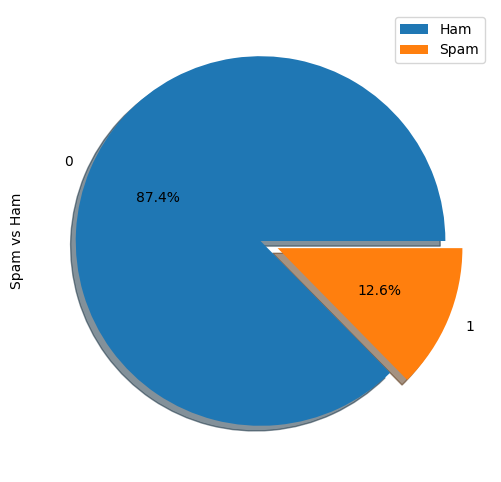

In [24]:
df["message_type"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [25]:
#natural language tool kit
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_words']=df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,message_type,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
# for 'spam' messages
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


*We can clearly see the spam messages are quite longer than the ham messages.*

<Axes: xlabel='num_characters', ylabel='Density'>

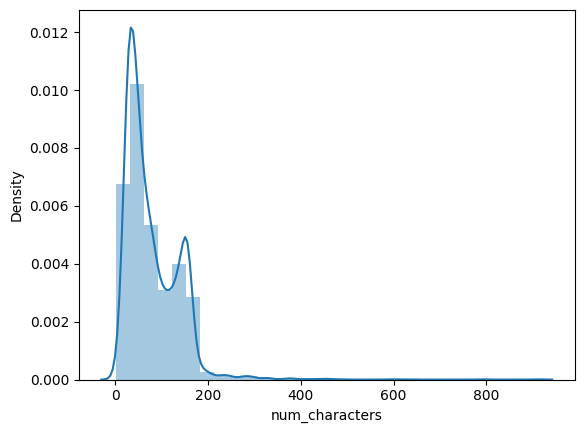

In [31]:
sns.distplot(df['num_characters'], bins=30)

<Axes: xlabel='message_type', ylabel='num_characters'>

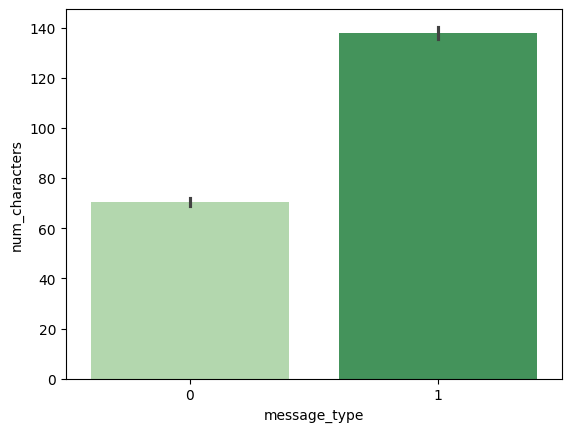

In [32]:
sns.barplot(x='message_type', y='num_characters', data=df, palette='Greens' )

<Axes: xlabel='num_characters', ylabel='Count'>

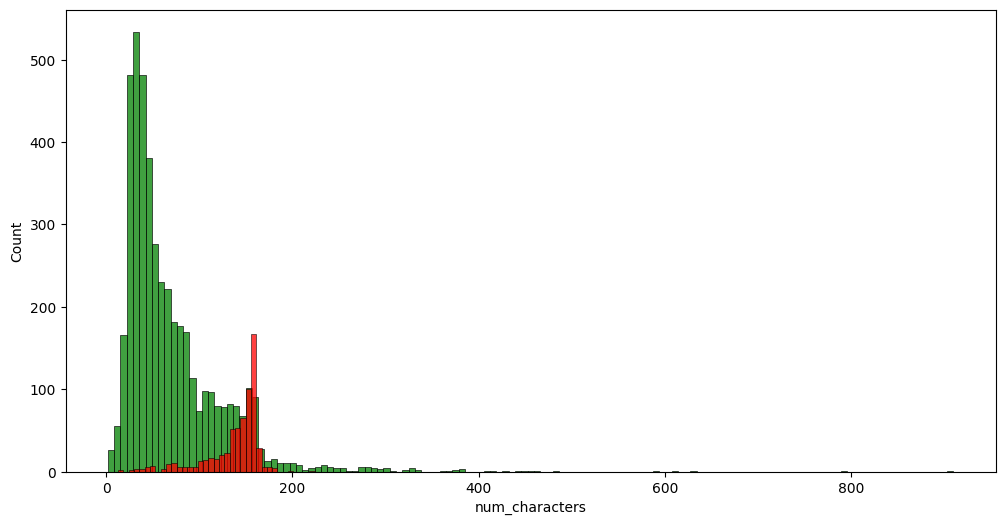

In [33]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

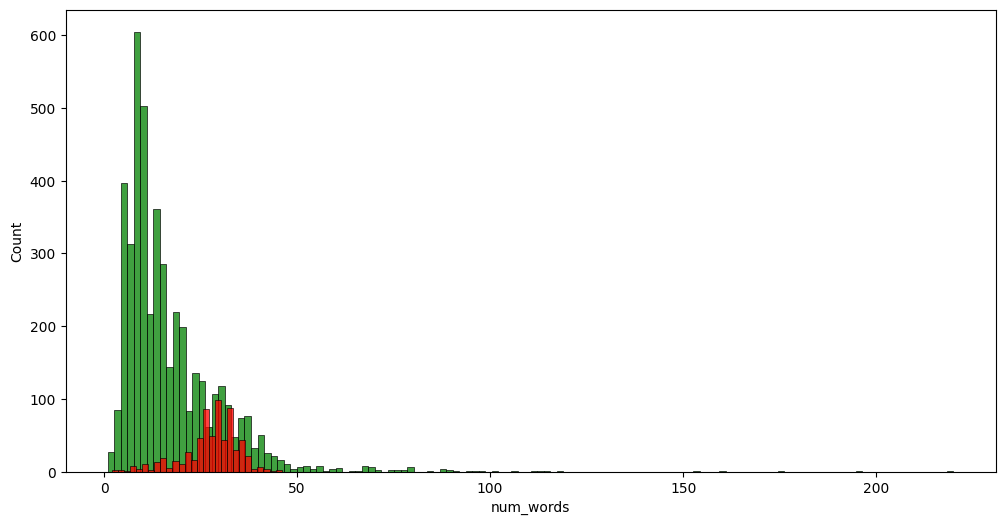

In [34]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

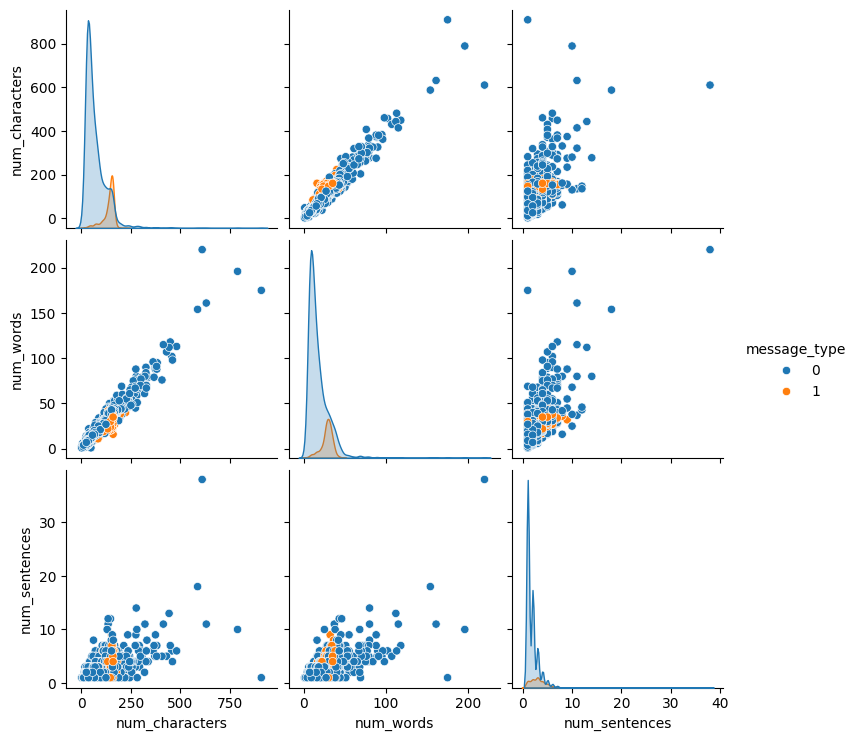

In [35]:
sns.pairplot(df, hue="message_type")

<Axes: >

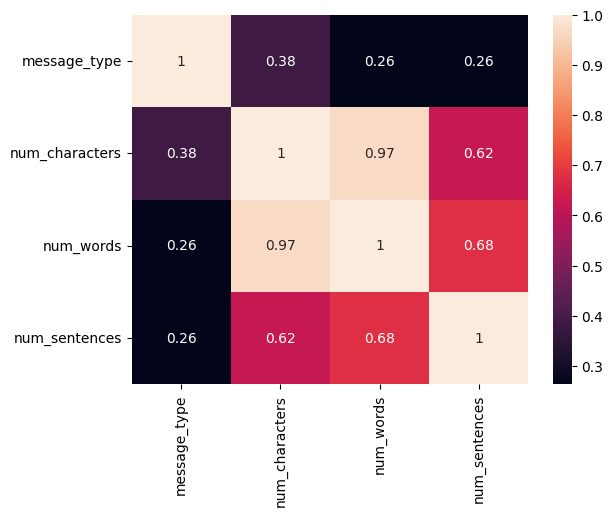

In [36]:
#plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

# Data Processing
- Lower case
- Tokenization
- Removing special chaeacters
- Removing stop words and punctuation
- Stemming and lemmatisation

In [37]:
#Removing stopwords and punctuation
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

In [189]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[]
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()

    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()

    #now stemming function
    for i in message:
        y.append(ps.stem(i))

    #return y  --> returns as list
    return " ".join(y)

In [40]:
# stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:
transformed_text = text_transform("I'm gonna be home soon and I don't ant to talk about this stuff anymore tonight")
print(transformed_text)

'm gon na home soon n't ant talk stuff anymor tonight


In [42]:
df['transformed_msg']=df['message'].apply(text_transform)
df.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


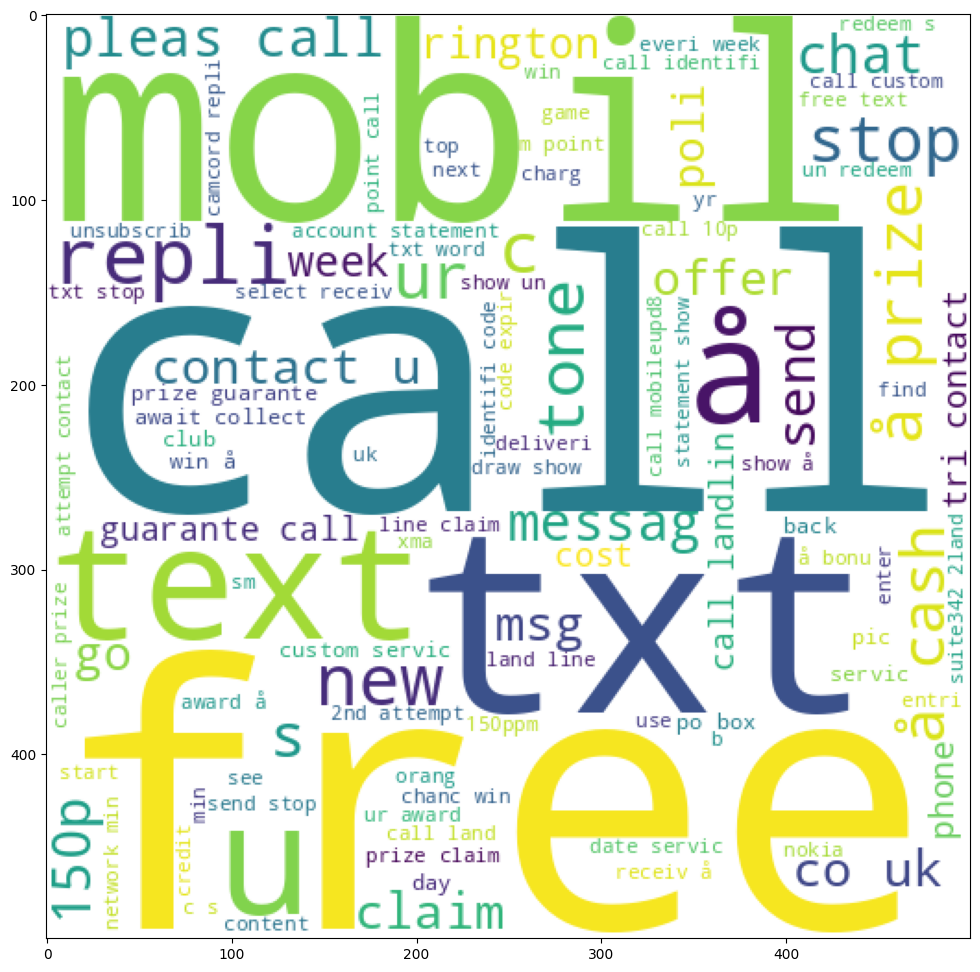

In [44]:
# For Spam
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

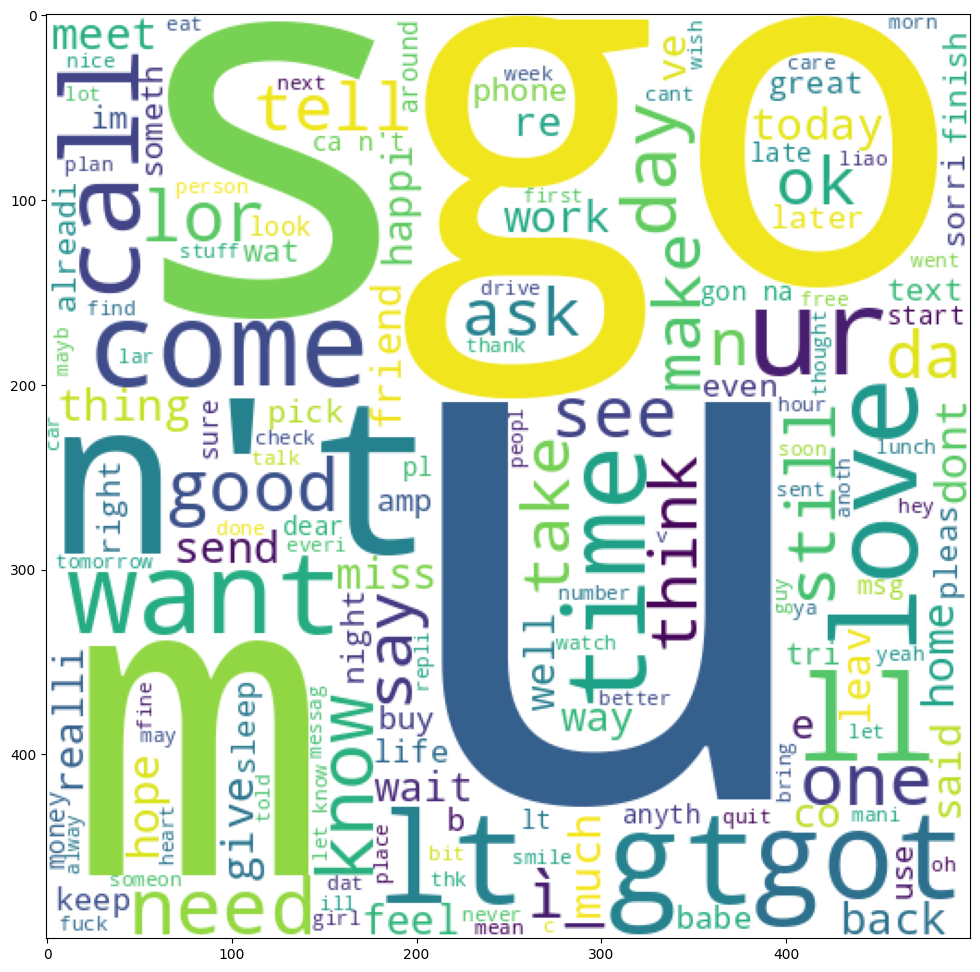

In [45]:
# For Ham
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)

In [46]:
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

11083

In [48]:
from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ("'s", 59),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45)]

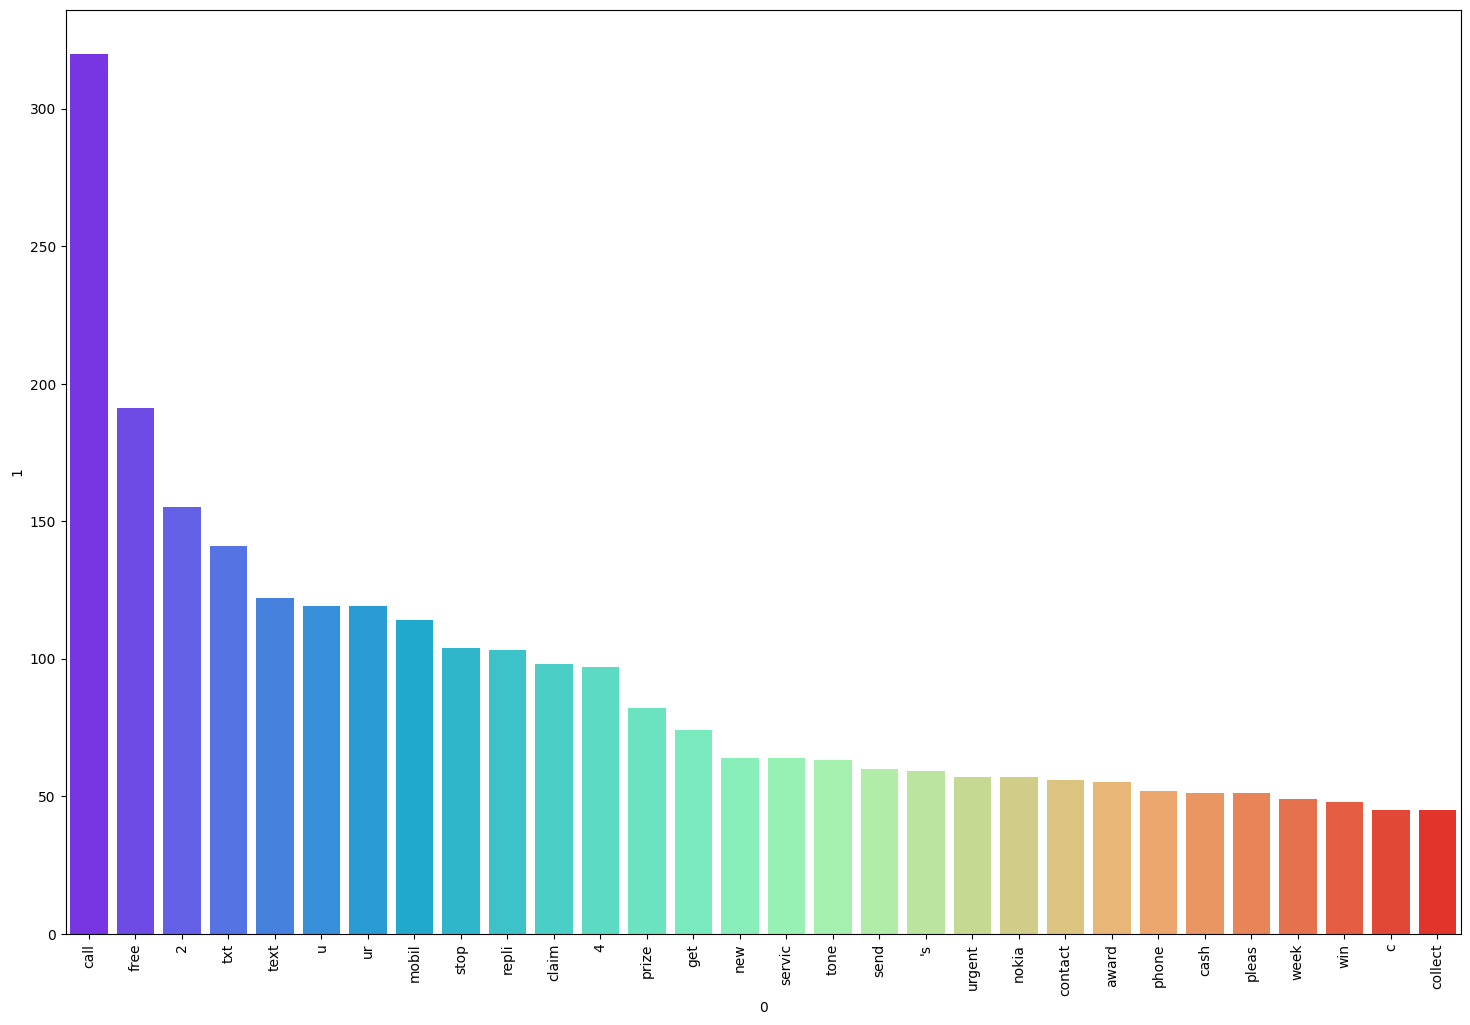

In [49]:
plt.figure(figsize=(18,12))
sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus=[]
for msg in df[df['message_type'] == 0]['transformed_msg'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


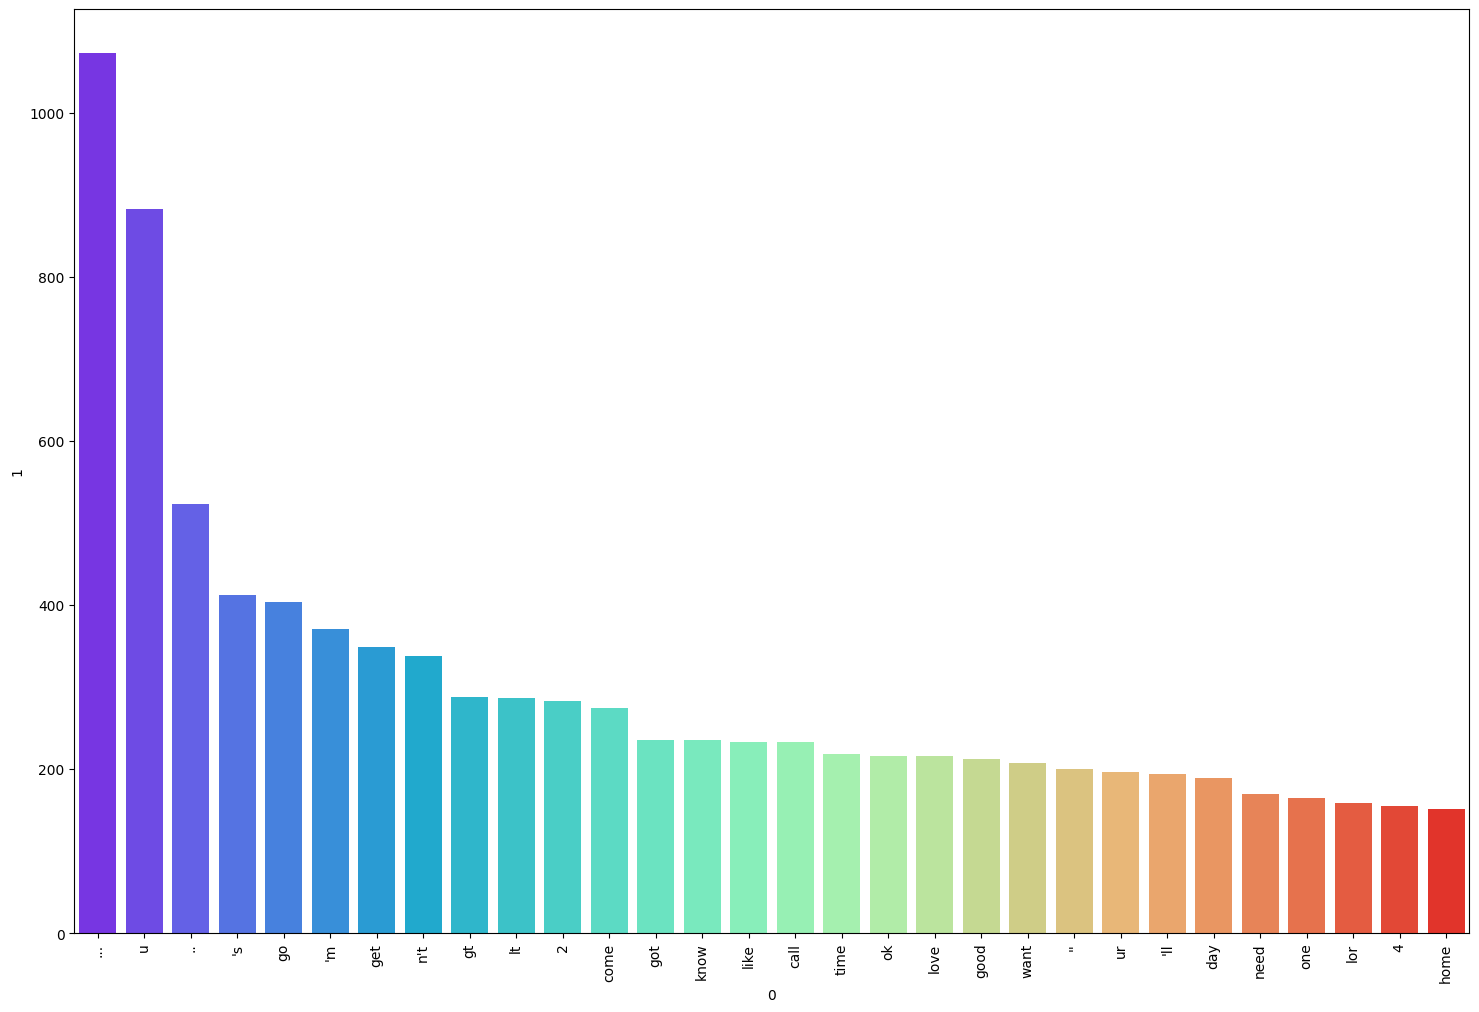

In [53]:
plt.figure(figsize=(18,12))
sns.barplot(x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [187]:
X = tfidf.fit_transform(df['transformed_msg']).toarray()

In [76]:
X.shape

(5169, 7377)

In [188]:
Y = df['message_type'].values

KeyError: 'target'

In [80]:
from sklearn.model_selection import train_test_split
X_train, Y_train, x_test, y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )
X_train, Y_train, x_test, y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )
X_train,x_test,y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [61]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [83]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(x_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8849129593810445
Confusion Matrix of Guassian NB is:  [[796 100]
 [ 19 119]]
Precision score of the Gaussian NB is 0.54337899543379


In [84]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(x_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9622823984526112
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 39  99]]
Precision score of the Multinomial NB is 1.0


In [86]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(x_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.97678916827853
Confusion Matrix of Bernoulli NB is:  [[893   3]
 [ 21 117]]
Precision score of the Bernoulli NB is 0.975


In [95]:
!pip install xgboost

In [98]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

In [105]:
svc=SVC(kernel='sigmoid', gamma=1.0)

knc=KNeighborsClassifier()

mnb=MultinomialNB()

dtc=DecisionTreeClassifier(max_depth=5)

lrc=LogisticRegression(solver="liblinear", penalty="11")

rfc=RandomForestClassifier(n_estimators=50, random_state=2)

abc=AdaBoostClassifier(n_estimators=50, random_state=2)

bc=BaggingClassifier(n_estimators=50, random_state=2)

etc=ExtraTreesClassifier(n_estimators=58, random_state=2)

gbdt=GradientBoostingClassifier(n_estimators=58, random_state=2)

xgb=XGBClassifier(n_estimators=50, random_state=2)

In [106]:
clfs= {

'SVC': svc,

'KN': knc,

'NB': mnb,

'DT': dtc,

'LR': lrc,

'RF': rfc,

'AdaBoost': abc,

'BgC': bc,

'ETC': etc,

'GBDT':gbdt,

'xgb':xgb

}

In [134]:
def train_classifier(clf,x_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy, precision

In [162]:
train_classifier(svc,X_train,y_train,x_test,y_test)

(0.971953578336557, 0.9739130434782609)

In [184]:
performance_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

# Sort the DataFrame by Precision column in descending order
performance_df = performance_df.sort_values(by='Precision', ascending=False)

print(performance_df)

  Algorithm  Accuracy  Precision
0       SVC  0.971954   0.972003


In [150]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.971954
1,SVC,Precision,0.972003


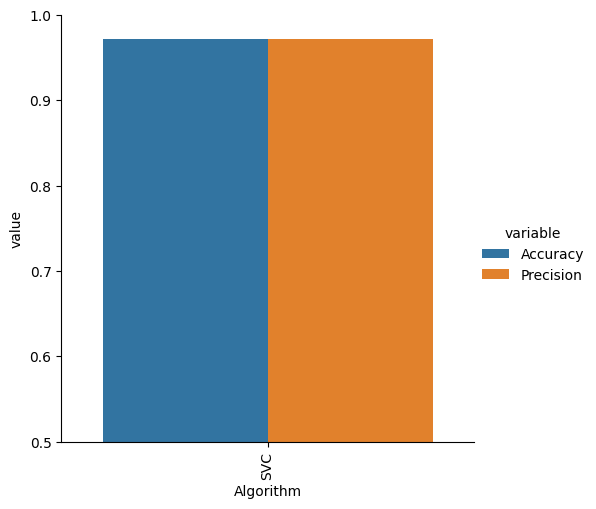

In [151]:
sns.catplot(x = 'Algorithm', y='value',hue='variable', data=performance_df1, kind='bar', height=5)

plt.ylim(0.5,1.0)

plt.xticks (rotation="vertical")

plt.show()

In [ ]:
#Change the max_feature parameter in TFIDF.
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_score,'Precision_max_ft_3000':precision_score}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')

new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_score,'Precision_num_chars':precision_score}).sort_values('Precision_num_chars',ascending=False)

new_df_scaled.merge(temp_df,on='Algorithm')

After a lot of experiments and improvement, we have trained our model to get an Accuracy score of 97% and a precision Score of 100*